In [49]:
import pandas as pd

In [50]:
df_trip = pd.read_csv("../resources/trip.csv", error_bad_lines=False)
df_station = pd.read_csv("../resources/station.csv")
df_weather = pd.read_csv("../resources/weather.csv")



b'Skipping line 50794: expected 12 fields, saw 20\n'


What is the average trip duration for a borrowed bicycle?



In [51]:
df_trip["tripduration"].mean()

1178.2956753399776

What’s the most common age of a bicycle-sharer?
    

In [52]:
(2020 - df_trip["birthyear"]).mean()

40.24093790793873

Given all the weather data here, find the average precipitation per month, and the median precipitation.
   

In [53]:
# pd.to_datetime(df_weather["Date"], format='%m/%d/%Y', errors='ignore')
# df_weather['Date']= pd.to_datetime(df_weather['Date'], format="%Y/%m/%d") 
# df_weather.info()
# df_weather.resample('M')


 What’s the average number of bikes at a given bike station?
 

In [54]:
df_station["current_dockcount"].mean()

16.517241379310345

   When a bike station is modified, is it more likely that it’ll lose bikes or gain bikes? How do you know?
 

In [58]:
df_station["modify_bike_delta"] = df_station["install_dockcount"] - df_station["current_dockcount"]
df_station["is_modified"] = False == pd.isna(df_station["modification_date"])
print("average delta for modified and unmodified stations")
df_station[["is_modified", "modify_bike_delta"]].groupby("is_modified").mean()

average delta for modified and unmodified stations


,modify_bike_delta
is_modified,
False,-0.048780
True,3.764706


   Come up with 3 more questions that can be answered with this data set.

## Q1 Gender of riders?

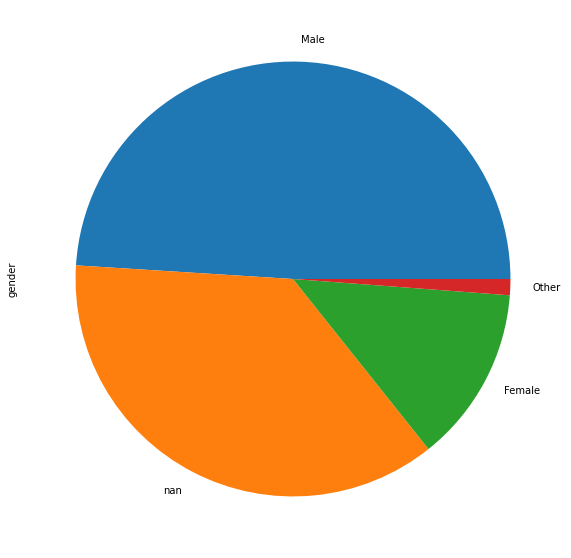

In [68]:
df_trip["gender"].value_counts(dropna=False).plot.pie(y="Gender Of Riders", figsize=(10,10))

## Average temp

In [71]:
df_weather["Mean_Temperature_F"].mean()

56.5843023255814

## Most popular stations?

In [83]:
sum_trips = df_trip["from_station_name"].value_counts() + df_trip["to_station_name"].value_counts()
sum_trips.sort_values().tail(5)

PATH / 9th Ave & Westlake Ave      17838
Westlake Ave & 6th Ave             20955
3rd Ave & Broad St                 21671
2nd Ave & Pine St                  23833
Pier 69 / Alaskan Way & Clay St    26790
dtype: int64